<a href="https://colab.research.google.com/github/NavyaS26/Internship/blob/main/Tensorflow_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


# Creating Tensors

In [2]:
x = tf.constant([
    [3, 5, 7],
    [4, 6, 8]
])
x

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[3, 5, 7],
       [4, 6, 8]], dtype=int32)>

In [3]:
x = tf.constant(4, shape=(1, 1), dtype=tf.float32)
print(x)

tf.Tensor([[4.]], shape=(1, 1), dtype=float32)


In [4]:
x = tf.constant([[1, 2, 3], [4, 5, 6]], shape=(2, 3))
print(x)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)


In [5]:
string = tf.Variable("this is a string", tf.string)
number = tf.Variable(324, tf.int16)
floating = tf.Variable(3.567, tf.float64)
print(string)
print(number)
print(floating)

<tf.Variable 'Variable:0' shape=() dtype=string, numpy=b'this is a string'>
<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=324>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.566999912261963>


# Rank/Degree of Tensors

In [6]:
rank1_tensor = tf.Variable(["Test"], tf.string)
rank2_tensor = tf.Variable([["test", "ok"], ["test", "yes"]], tf.string)
tf.rank(rank2_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

# Shape of Tensors

In [7]:
rank2_tensor.shape

TensorShape([2, 2])

# Changing the Shape of Tensor

In [8]:
tensor1 = tf.ones([1,2,3])  # tf.ones() creates a shape [1,2,3] tensor full of ones
tensor2 = tf.reshape(tensor1, [2,3,1])  # reshape existing data to shape [2,3,1]
tensor3 = tf.reshape(tensor2, [3, -1])  # -1 tells the tensor to calculate the size of the dimension in that place
                                        # this will reshape the tensor to [3,3]
# The number of elements in the reshaped tensor MUST match the number in the original
print(tensor1)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)


In [9]:
print(tensor2)

tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)


In [10]:
print(tensor3)

tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


In [11]:
matrix = [[1,2,3,4,5],
          [6,7,8,9,10],
          [11,12,13,14,15],
          [16,17,18,19,20]]

tensor = tf.Variable(matrix, dtype=tf.int32)
print(tf.rank(tensor))

tf.Tensor(2, shape=(), dtype=int32)


In [12]:
print(tensor.shape)

(4, 5)


# Tensor Slicing

In [13]:
y = x[:,1]
y

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 5], dtype=int32)>

In [14]:
three = tensor[0,2]  # selects the 3rd element from the 1st row
print(three)

tf.Tensor(3, shape=(), dtype=int32)


In [15]:
row1 = tensor[0]
print(row1)

tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)


In [16]:
column1 = tensor[:, 0]  # selects the first column
print(column1)

tf.Tensor([ 1  6 11 16], shape=(4,), dtype=int32)


In [17]:
row_2_and_4 = tensor[1::2]  # selects second and fourth row
print(row_2_and_4)

tf.Tensor(
[[ 6  7  8  9 10]
 [16 17 18 19 20]], shape=(2, 5), dtype=int32)


In [18]:
column_1_in_row_2_and_3 = tensor[1:3, 0]
print(column_1_in_row_2_and_3)

tf.Tensor([ 6 11], shape=(2,), dtype=int32)


In [19]:
y = tf.reshape(x, [3, 2])
y

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

# TensorFlow 2.x MNIST Classification with DNN (Only Dense Layers)

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
# Load and preprocess data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28*28)) / 255.0
test_images = test_images.reshape((10000, 28*28)) / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


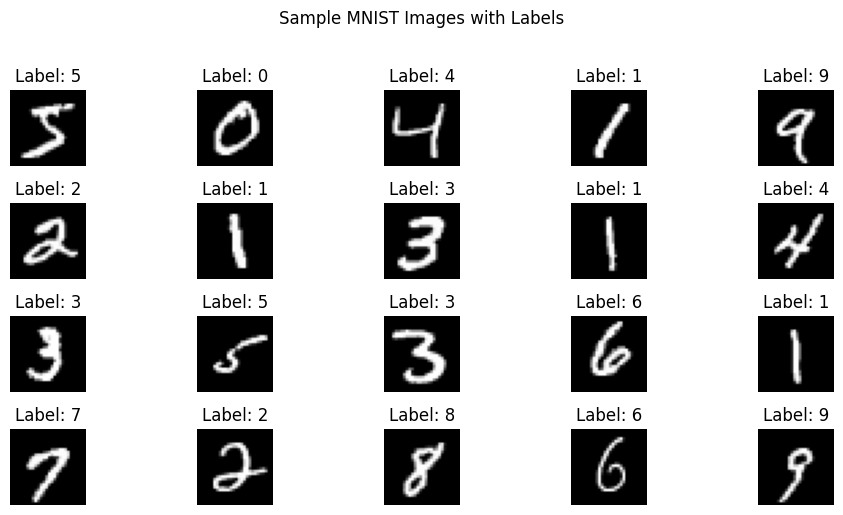

In [21]:
plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.suptitle('Sample MNIST Images with Labels', y=1.02)
plt.tight_layout()
plt.show()

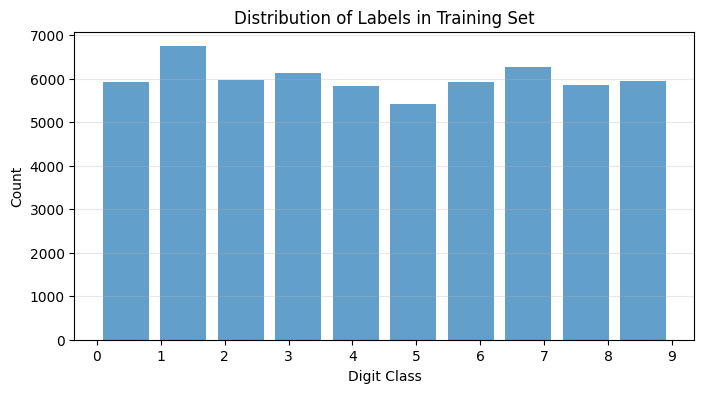

In [22]:
plt.figure(figsize=(8, 4))
plt.hist(train_labels, bins=10, rwidth=0.8, alpha=0.7)
plt.xticks(range(10))
plt.title('Distribution of Labels in Training Set')
plt.xlabel('Digit Class')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [32]:
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28*28,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=15, batch_size=128,
                    validation_data=(test_images, test_labels))

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8778 - loss: 0.4233 - val_accuracy: 0.9685 - val_loss: 0.1039
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9727 - loss: 0.0906 - val_accuracy: 0.9756 - val_loss: 0.0842
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9832 - loss: 0.0541 - val_accuracy: 0.9772 - val_loss: 0.0733
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9901 - loss: 0.0338 - val_accuracy: 0.9811 - val_loss: 0.0638
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9918 - loss: 0.0254 - val_accuracy: 0.9795 - val_loss: 0.0718
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9938 - loss: 0.0187 - val_accuracy: 0.9794 - val_loss: 0.0752
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9940 - loss: 0.0188 - val_accuracy: 0.9770 - val_loss: 0.0798
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9939 - loss: 0.0182 - val_acc

In [33]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9769 - loss: 0.1275

Test accuracy: 0.9806


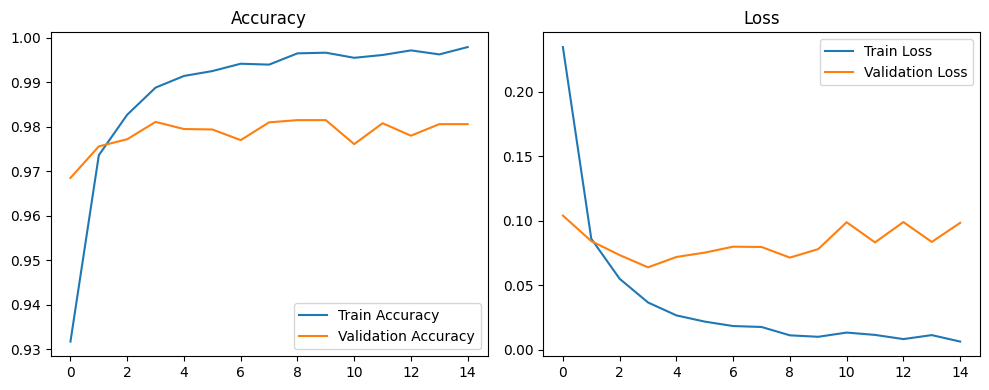

In [34]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


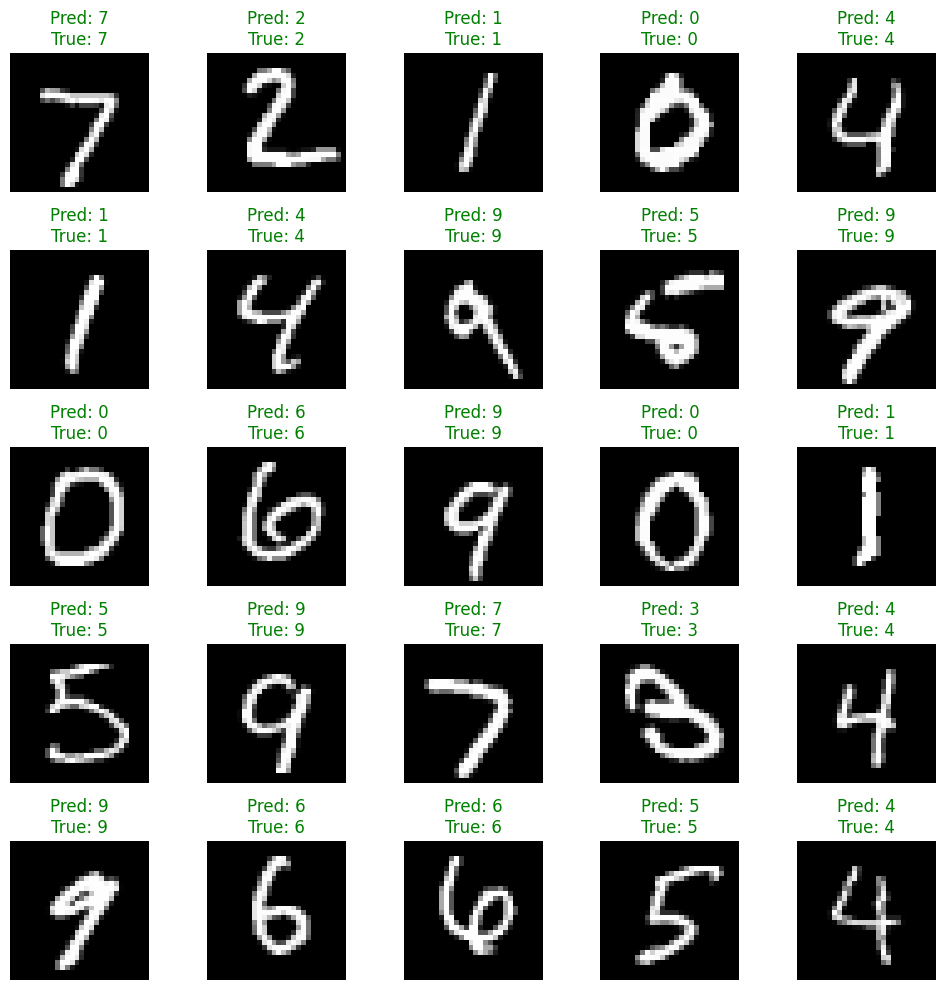

In [35]:
predictions = model.predict(test_images)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    pred_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [36]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the pixel values (scale between 0 and 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Check shape
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [37]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))


In [40]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9875 - loss: 0.0443 - val_accuracy: 0.9815 - val_loss: 0.0769
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9876 - loss: 0.0412 - val_accuracy: 0.9825 - val_loss: 0.0802
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9885 - loss: 0.0394 - val_accuracy: 0.9829 - val_loss: 0.0777
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9879 - loss: 0.0393 - val_accuracy: 0.9816 - val_loss: 0.0819
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9890 - loss: 0.0354 - val_accuracy: 0.9833 - val_loss: 0.0823
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9881 - loss: 0.0391 - val_accuracy: 0.9831 - val_loss: 0.0762
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9901 - loss: 0.0325 - val_accuracy: 0.9831 - val_loss: 0.0727
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.9898 - loss: 0

In [41]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9780 - loss: 0.1277
Test Accuracy: 0.9818000197410583
